Top-Selling Products:
ProductName
ActiveWear Smartwatch    40
SoundWave Headphones     38
BookWorld Biography      30
ActiveWear Rug           29
SoundWave Cookbook       29
Name: count, dtype: int64

Transaction Count by Region:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

Average Spending by Category:
Category
Books          711.657296
Clothing       728.818684
Electronics    711.746063
Home Decor     608.443266
Name: TotalValue, dtype: float64

Transactions per Month:
TransactionMonth
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: count, dtype: int64

Average Quantity Sold by Region:
Region
Asia             2.568807
Europe           2.542735
North America    2.430328
South America    2.595395
Name: Quantity, dtype: float64

Customer Signup Trend by Year:
SignupDate
2022    332
2023    281
2024    387
Name: count, dtype: int64


/var/folders/5r/m9_8qsnj3_92gld55273098m0000gn/T/ipykernel_12616/825461298.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


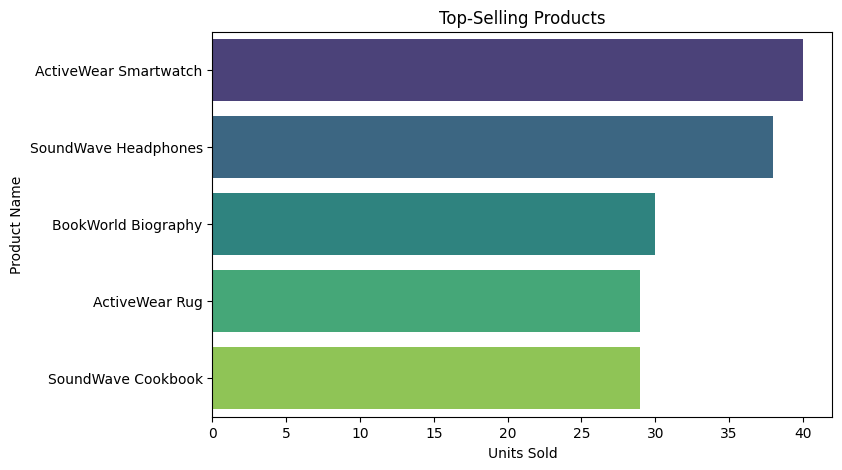

/var/folders/5r/m9_8qsnj3_92gld55273098m0000gn/T/ipykernel_12616/825461298.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette='magma')


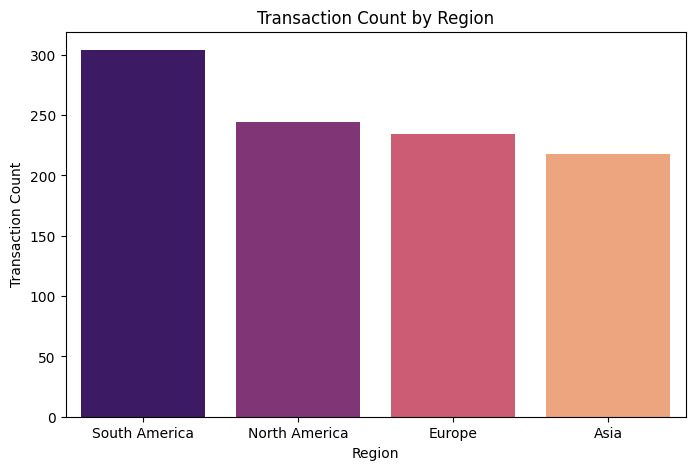

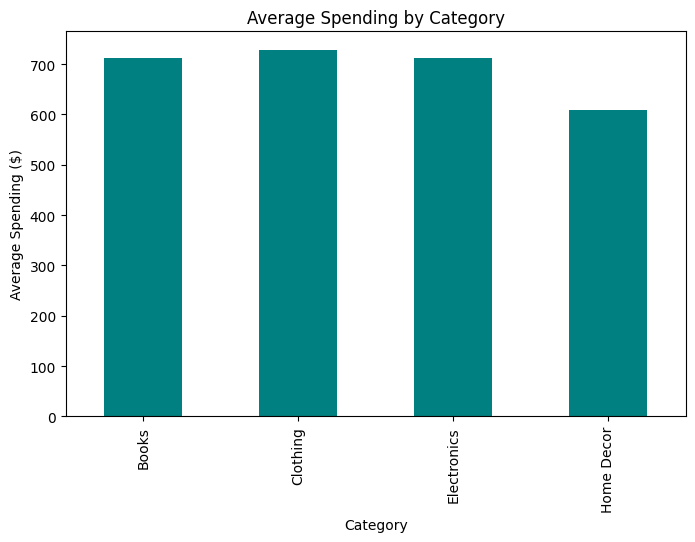

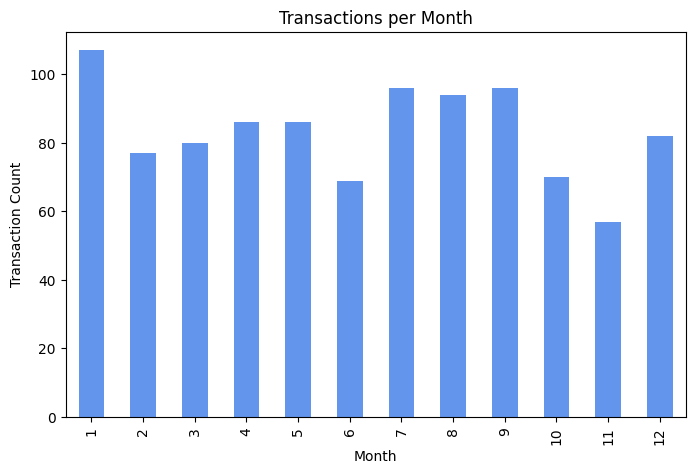

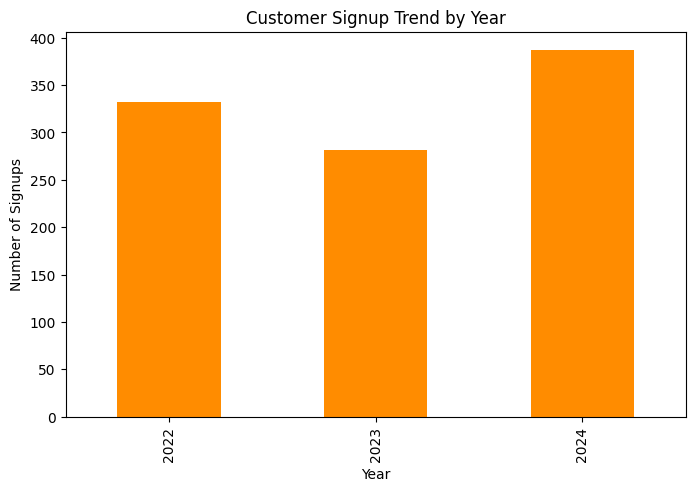

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'Merged_Data.csv'
data = pd.read_csv(file_path)

# Data Cleaning and Preparation
# Dropping redundant columns
data = data.drop(columns=['Price_y'])

# Converting date columns to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['SignupDate'] = pd.to_datetime(data['SignupDate'])

# Extracting additional time-based features
data['TransactionMonth'] = data['TransactionDate'].dt.month
data['TransactionDay'] = data['TransactionDate'].dt.day_name()

# EDA
# 1. Top-selling products
top_products = data['ProductName'].value_counts().head(5)
print("Top-Selling Products:")
print(top_products)

# 2. Regional transaction distribution
top_regions = data['Region'].value_counts()
print("\nTransaction Count by Region:")
print(top_regions)

# 3. Average spending by category
avg_spend_by_category = data.groupby('Category')['TotalValue'].mean()
print("\nAverage Spending by Category:")
print(avg_spend_by_category)

# 4. Monthly sales distribution
transactions_per_month = data['TransactionMonth'].value_counts().sort_index()
print("\nTransactions per Month:")
print(transactions_per_month)

# 5. Average quantity by region
avg_quantity_by_region = data.groupby('Region')['Quantity'].mean()
print("\nAverage Quantity Sold by Region:")
print(avg_quantity_by_region)

# 6. Customer signup trend
customer_signup_trend = data['SignupDate'].dt.year.value_counts().sort_index()
print("\nCustomer Signup Trend by Year:")
print(customer_signup_trend)

# Visualizations
# Top-selling products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top-Selling Products")
plt.xlabel("Units Sold")
plt.ylabel("Product Name")
plt.show()

# Regional transaction distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=top_regions.index, y=top_regions.values, palette='magma')
plt.title("Transaction Count by Region")
plt.xlabel("Region")
plt.ylabel("Transaction Count")
plt.show()

# Average spending by category
plt.figure(figsize=(8, 5))
avg_spend_by_category.plot(kind='bar', color='teal')
plt.title("Average Spending by Category")
plt.ylabel("Average Spending ($)")
plt.xlabel("Category")
plt.show()

# Monthly sales distribution
plt.figure(figsize=(8, 5))
transactions_per_month.plot(kind='bar', color='cornflowerblue')
plt.title("Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.show()

# Customer signup trend
plt.figure(figsize=(8, 5))
customer_signup_trend.plot(kind='bar', color='darkorange')
plt.title("Customer Signup Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()
